
0: 320x640 (no detections), 8.3ms
Speed: 2.5ms preprocess, 8.3ms inference, 0.4ms postprocess per image at shape (1, 3, 320, 640)


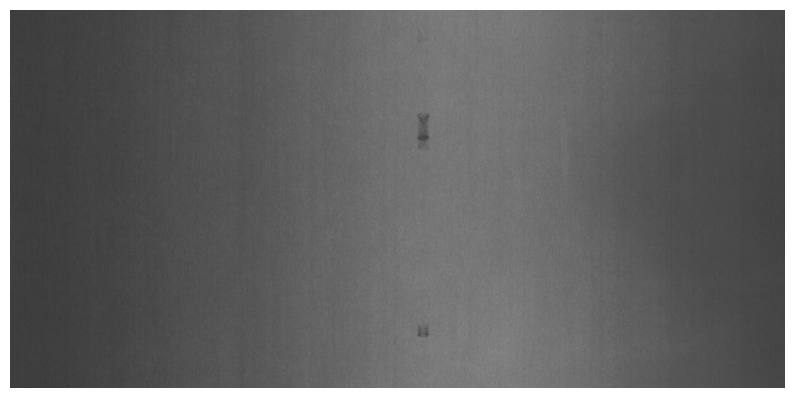

In [6]:
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

def load_yolov8_model(weights_path):
    """
    Load the YOLOv8 model with the given weights.

    Parameters:
    weights_path (str): Path to the YOLOv8 weights file.

    Returns:
    model: Loaded YOLOv8 model.
    """
    model = YOLO(weights_path)
    return model

def run_inference(model, image_path):
    """
    Run inference on an input image using the YOLOv8 model.

    Parameters:
    model: Loaded YOLOv8 model.
    image_path (str): Path to the input image.

    Returns:
    results: YOLOv8 inference results.
    """
    image = cv2.imread(image_path)
    results = model(image)
    return results

def display_results(image_path, results):
    """
    Display the inference results on the input image.

    Parameters:
    image_path (str): Path to the input image.
    results: YOLOv8 inference results.
    """
    image = cv2.imread(image_path)
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            conf = box.conf[0]
            cls = box.cls[0]
            label = f"{model.names[int(cls)]}: {conf:.2f}"
            cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage:
weights_path = 'weights/yolov8_6.pt'
image_path = 'data/0291.jpg'

model = load_yolov8_model(weights_path)
results = run_inference(model, image_path)
display_results(image_path, results)


In [7]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p